## Binary Classification

Two-Class classification or Binary Classification may be one of the most common applied kind of Machine-Learning problem.

**IMDB Dataset:** 50,000 highly polarized reviews, splited into 25,000 reviews for training and the remaining for testing. Each one consisting of half positive and half negative reviwes.

***Importance of training:*** The model is able to *learn* generalizations. One must be careful of not *overfitting* or *learning characteristics*.

---

### Loading the IMDB Dataset

In [3]:
from tensorflow import keras
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 15s 1us/step


The argument *num_words = 10000* means it will be keep the top 10,000 most frequently occurring words

Variables <font color=red>*train_data*</font> and <font color=red>*test_data*</font> are lists of reviews; each review is a list of ***words indices***

In [12]:
print("train: ", len(train_data), " test: ",len(test_data))

train:  25000  test:  25000


<font color=red>*train_labels*</font> and <font color=red>*test_labels*</font> are lists of 0s and 1s

In [14]:
print("train:",train_labels,"test: ",test_labels)

train: [1 0 0 ... 0 1 0] test:  [0 1 1 ... 0 0 0]


Here is how to decode these reviews:

In [28]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

So, the decode function takes the indices from reviews and makes the transformation with the dictionary of words

In [29]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

---

### Preparing the data

One most turn the lists into tensors, there are two ways to do it:

- Pad lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in your network a layer capable of handling such integer tensors
- One-hot encode lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then one could use as the first layer in the network a Dense layer, capable of handling floating-point vector data


**Vectorizing the data:**

In [47]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [48]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [49]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

---
### Building the network

A type of network that performs well on such a problem is a simple stack of fully connected *(Dense)* layers with *relu* activations: *Dense(16, activation='relu')*

**Note:** The argument being passed to each *Dense* layer is the number of ***hidden units*** of the layer.
A **hidden unit** is a dimension in the representation space of the layer

Having more hidden units allows the network to learn more complex representations, but it makes it more computationally expensive and could *overfit* the model.

There are two architecture decisions about a stack of *Dense* layers:

- How many layers to use
- How many hidden layers to choose in each layer

Is possible to use different activation functions inside the *Dense* layers, in this case will be used *relu* and *sigmoid* functions, which means zero for negative values and arbitrary values into [0,1] that can be interpreted as probably, respectively

In [50]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Finally, is needed to choose a loss function and an optmizer

In [52]:
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])

---
### Validating the approach

In [54]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Now the model will be trained 20 epochs and 512 mini-batches

In [64]:
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1577 - acc: 0.9434 - val_loss: 0.1582 - val_acc: 0.9439
Epoch 2/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.1241 - acc: 0.9591 - val_loss: 0.1763 - val_acc: 0.9335
Epoch 3/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.1031 - acc: 0.9687 - val_loss: 0.1763 - val_acc: 0.9330
Epoch 4/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.0891 - acc: 0.9751 - val_loss: 0.1890 - val_acc: 0.9293
Epoch 5/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.0737 - acc: 0.9798 - val_loss: 0.2102 - val_acc: 0.9214
Epoch 6/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.0617 - acc: 0.9848 - val_loss: 0.2278 - val_acc: 0.9182
Epoch 7/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.0522 - acc: 0.9875 - val_loss: 0.2724 - 

**Ploting training and validation loss:**

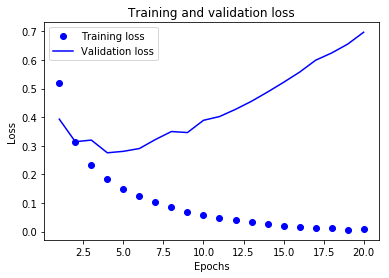

In [59]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Ploting the training and validation accuracy**

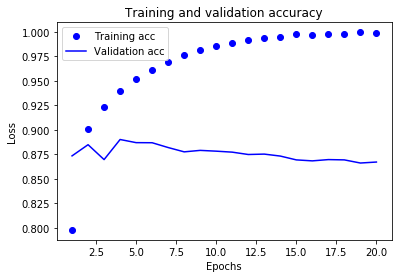

In [61]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Training loss is decreasing and training accuracy is increasing, thats what is expected running gradient optimization.

This is an example of a model which is ***overfitting*** the data, to solve this there are a bunch of techniques, however for this case will be just made from scratch. Four epochs:

In [68]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.4362 - accuracy: 0.8198
Epoch 2/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.2491 - accuracy: 0.9126
Epoch 3/4
25000/25000 [==============================] - 2s 65us/step - loss: 0.1926 - accuracy: 0.9324
Epoch 4/4
25000/25000 [==============================] - 1s 46us/step


In [69]:
results

[0.33050873030662536, 0.8729599714279175]

---
### Using a trained network to generate predictions on new data

Is possible to create the likelihood of reviews being positive by using the *predict* method:

In [70]:
model.predict(x_test)

array([[0.26350027],
       [0.99990916],
       [0.9763839 ],
       ...,
       [0.15491244],
       [0.15810943],
       [0.8336415 ]], dtype=float32)

---

## Experiments
---

### Experiment #1:

**Values:**

- Hidden Layers: 2
- Hidden units: 8
- Epochs: 4
- Batch size: 512
- Optizer: rmsprop
- Loss: binary_crossentropy
- Activation: relu, relu, sigmoid

**Results:**

- Evaluate function: 0.88

### Experiment #2:

**Values:**

- Hidden Layers: 6
- Hidden units: 32
- Epochs: 6
- Batch size: 512
- Optizer: rmsprop
- Loss: binary_crossentropy
- Activation: relu, relu, sigmoid

**Results:**

- Evaluate function: 0.86

### Experiment #3:

**Values:**

- Hidden Layers: 6
- Hidden units: 128
- Epochs: 6
- Batch size: 512
- Optizer: rmsprop
- Loss: binary_crossentropy
- Activation: relu, relu, sigmoid

**Results:**

- Evaluate function: 0.86

### Experiment #4:

**Values:**

- Hidden Layers: 4
- Hidden units: 128
- Epochs: 6
- Batch size: 216
- Optizer: rmsprop
- Loss: mse
- Activation: tanh, sigmoid

**Results:**

- Evaluate function: 0.86

In [103]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=216)

results = model.evaluate(x_test, y_test)
print('results:',results)

# model.compile(optimizer='rmsprop',
#             loss='binary_crossentropy',
#             metrics=['acc'])

# history = model.fit(partial_x_train,
#                     partial_y_train,
#                     epochs=4,
#                     batch_size=512,
#                     validation_data=(x_val, y_val))

# plt.clf()

# history_dict = history.history
# loss_values = history_dict['loss']
# val_loss_values = history_dict['val_loss']

# epochs = range(1, len(history_dict['acc']) + 1)

# plt.plot(epochs, loss_values, 'bo', label='Training loss')
# plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

# plt.clf()

# acc_values = history_dict['acc']
# val_acc_values = history_dict['val_acc']

# plt.plot(epochs, acc_values, 'bo', label='Training acc')
# plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

Epoch 1/6
25000/25000 [==============================] - 4s 148us/step - loss: 0.1139 - accuracy: 0.8391
Epoch 2/6
25000/25000 [==============================] - 4s 146us/step - loss: 0.0644 - accuracy: 0.9162
Epoch 3/6
25000/25000 [==============================] - 4s 142us/step - loss: 0.0497 - accuracy: 0.9361
Epoch 4/6
25000/25000 [==============================] - 3s 138us/step - loss: 0.0413 - accuracy: 0.9490
Epoch 5/6
25000/25000 [==============================] - 3s 137us/step - loss: 0.0355 - accuracy: 0.9556
Epoch 6/6
25000/25000 [==============================] - 3s 101us/step
results: [0.11276838988482953, 0.8642399907112122]


---
### Conclusions:

- Preprosessing is important
- *Relu* is quite useful
- In Binary Classification problems, one should end with a *Dense* layer with one unit and *sigmoid* function
- Loss function for Binary Classification is *binary_crossentropy*
- Generally *rmsprop* is a good choice
- Neural Networks usually end up overfitting data after some loops